# Evaluación Parcial 2 Deep Learning

- Profesor: Felipe Zambrano

### Instrucciones generales

- Esta prohibido compartir las respuestas con otros grupos.
- Indicios de copia serán penalizados con la nota mínima.
- Cualquier duda fuera del horario de clases se debe enviar por el AVA. Mensajes al docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente, si utiliza material extra debe citarlo.

### Sobre la entrega
  * Antes de comenzar a realizar la evaluación, guarde una copia de este cuadernillo en su Google Drive (`Archivo > Guardar una copia en Drive`). No hacer esto puede implicar que su trabajo no se guarde correctamente.
  *  Debe descargar este cuardenillo de Google Colab como un archivo `.ipynb` (`Archivo > Descargar > Descargar .ipynb`). No se revisarán otros formatos de entrega. Recuerde guardar su desarrollo antes de descargar el archivo correspondiente.
  *  El archivo debe ser reproducible, o sea si cargo el archivo en Google Colab y ejecuto todas las celdas, debe reproducir los resultados que usted obtuvo.
  *  Se debe subir el archivo `.ipynb` descargado al AVA en el apartado Experiencia de Aprendizaje 2: Redes Convolucionales -> Evaluación Parcial EA2.
  *  La fecha límite de entrega es el **sábado 14 de junio hasta las 10 am**. Por cada hora de retraso, se descontará un punto de la nota final. Ejemplo: Si entrega entre 10:00 y 10:59, la nota máxima será 6.0. Si entrega entre 11:00 y 11:59, la nota máxima será 5.0, y así sucesivamente.
  *  Ante cualquier sospecha de copia, reprobarán automáticamente el curso con nota mínima (1.0) los involucrados. La discusión entre pares siempre es beneficiosa y fomenta diálogos interesantes, pero cada grupo debe desarrollar su propio trabajo.
  * El cálculo de la nota de la evaluación esta dado por: $\text{Nota}=1+{\sum_{i=1}^7\text{PuntajePregunta}_i \over 7}$


### Grupo Nº
> POR FAVOR AGREGAR EL NÚMERO DE GRUPO

### Integrantes del grupo

> POR FAVOR AGREGAR TODOS LOS NOMBRES DE LOS INTEGRANTES



### Sobre el dataset

Para esta evaluación, cada grupo deberá trabajar con el dataset que contiene imágenes de personajes de Los Simpson. Deberán seleccionar 10 personajes diferentes (categorías/clases) para construir su modelo de clasificación de imágenes con una red neuronal convolucional.

Se recomienda guardar el mejor modelo con `ModelCheckpoint` y usar `TensorBoard` para visualizar la evolución de la función de pérdida y precisión tanto en el conjunto de entrenamiento como en el de validación a lo largo de la épocas.

In [1]:
# 1. Cargar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [8]:
# 2. Cargar el dataset con las imágenes de Los Simpson
dataset_path = 'simpsons_train/simpsons/agnes_skinner'

**1.** **[6 pts]** Describa las características del dataset:
- Personajes seleccionados (Categorías)
- Tamaño de las imágenes
- Tamaño del dataset
- Tamaño del conjunto de entrenamiento
- Tamaño del conjunto de test
- Indique si las clases están balanceadas


In [14]:
# Responda aqui:
#Obtener el nombre de la carpeta del dataset:
dataset_name = os.path.basename(dataset_path)
print(f"Nombres Personajes: {dataset_name}")

Nombre Personajes: agnes_skinner


In [15]:
# Obtener el tamaño de las imágenes
image_files = os.listdir(dataset_path)
image_size = cv2.imread(os.path.join(dataset_path, image_files[0])).shape
print(f"Tamaño de las imágenes: {image_size[0]}x{image_size[1]} píxeles, Canales: {image_size[2]}")

Tamaño de las imágenes: 432x576 píxeles, Canales: 3


In [16]:
# Obtener el tamaño del dataset
dataset_size = len(image_files)
print(f"Tamaño del dataset: {dataset_size} imágenes")

Tamaño del dataset: 42 imágenes


In [18]:
# Obtener el tamaño del conjunto de entrenamiento y test
train_size = int(0.8 * dataset_size)  # 80% para entrenamiento
test_size = dataset_size - train_size  # 20% para test
print(f"Tamaño del conjunto de entrenamiento: {train_size} imágenes")
print(f"Tamaño del conjunto de test: {test_size} imágenes")

Tamaño del conjunto de entrenamiento: 33 imágenes
Tamaño del conjunto de test: 9 imágenes


In [22]:
# Verificar si las clases están balanceadas
class_counts = pd.Series([dataset_name] * dataset_size).value_counts()
print("Clases y su cantidad de imágenes:")
print(class_counts)


Clases y su cantidad de imágenes:
agnes_skinner    42
Name: count, dtype: int64


**2.** **[6 pts]** Genere una previsualización de 10 imágenes por categoría

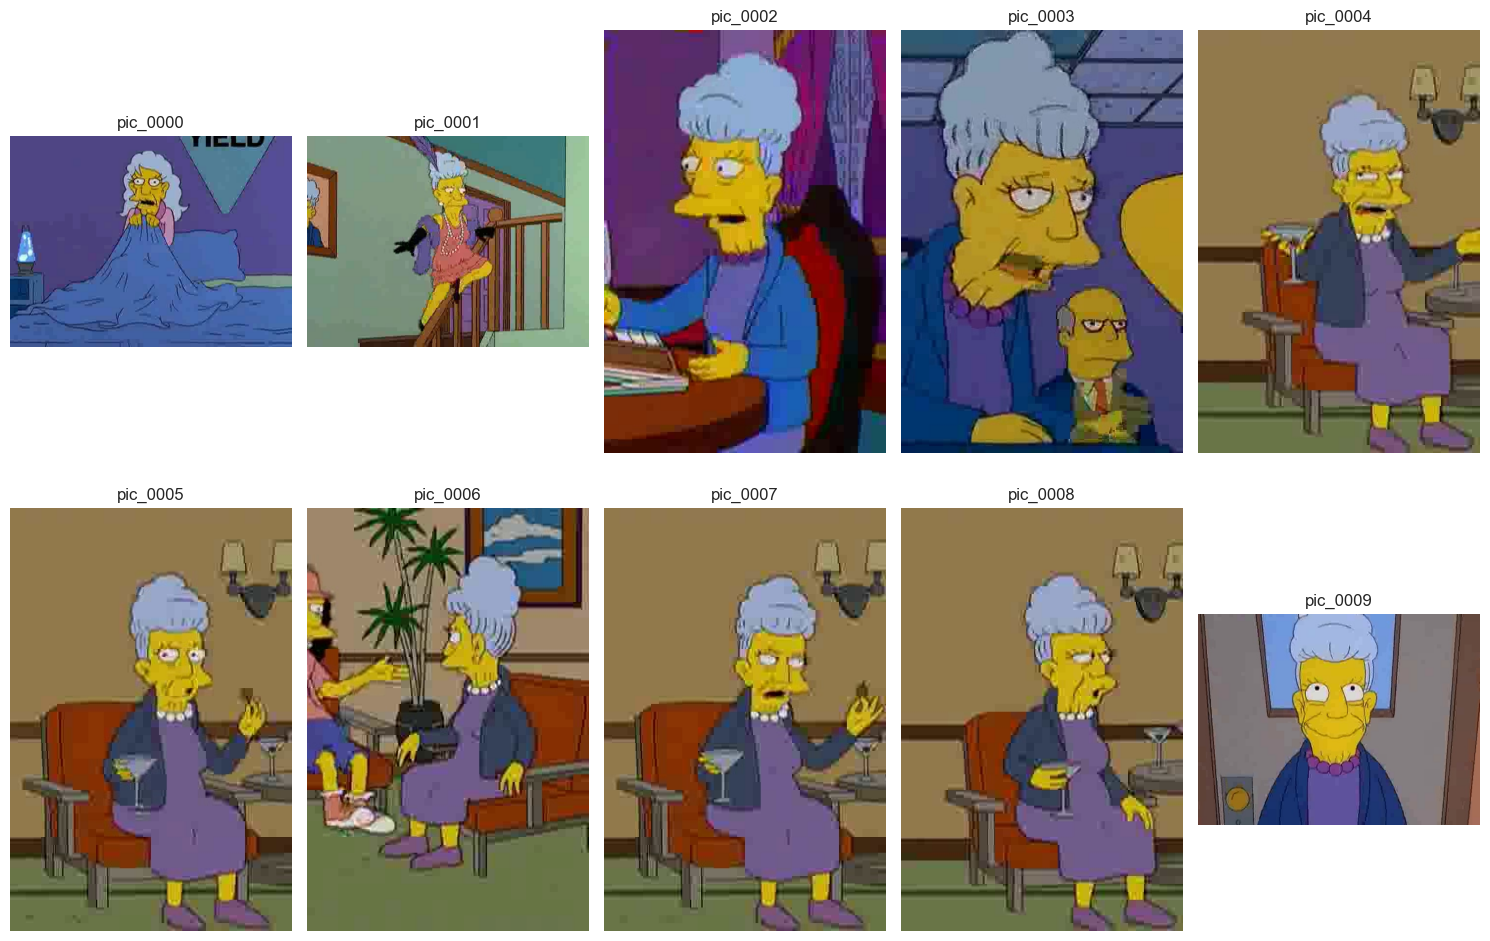

In [26]:
# Responda aquí:
#Genear una previsualización de 10 imágenes por categoría
def plot_images_from_folder(folder, num_images=10):
    images = os.listdir(folder)
    plt.figure(figsize=(15, 10))
    for i, image_name in enumerate(images[:num_images]):
        img_path = os.path.join(folder, image_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(image_name.split('.')[0])  # Mostrar el nombre del archivo sin extensión
    plt.tight_layout()
    plt.show()
# Llamar a la función para mostrar las imágenes
plot_images_from_folder(dataset_path, num_images=10)


**3.** **[6 pts]** Separe el dataset en un conjunto de entrenamiento y test, y posteriormente normalice los datos

In [27]:
# Responda aquí:
from sklearn.model_selection import train_test_split
# Cargar todas las imágenes y sus etiquetas
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64))  # Redimensionar a 64x64 píxeles
                images.append(img)
                labels.append(folder.split('/')[-1])  # Usar el nombre de la carpeta como etiqueta
    return np.array(images), np.array(labels)

# Cargar las imágenes y etiquetas
images, labels = load_images_from_folder(dataset_path)
# Convertir las etiquetas a números
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
# Separar el dataset en conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)
# Normalizar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
# Verificar las dimensiones de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}, Etiquetas: {y_train.shape}")
print(f"Tamaño del conjunto de test: {X_test.shape}, Etiquetas: {y_test.shape}")


Tamaño del conjunto de entrenamiento: (33, 64, 64, 3), Etiquetas: (33,)
Tamaño del conjunto de test: (9, 64, 64, 3), Etiquetas: (9,)


**4.** **[6 pts]** Defina la arquitectura de la red neuronal convolucional con el detalle de cada capa:
- Especifique el tamaño de las imágenes de entrada con sus respectivos canales
- Especifique para cada capa convolucional el número de filtros o canales de la capa, el tamaño del filtro o kernel, el stride, el padding y la función de activación utilizada
- Especifique el tipo de Pooling junto con el tamaño del filtro y el stride cada vez que se utilice
- Especifique el tamaño del vector (flatten) o número de neuronas que ingresan a la MLP
- Especifique el número de capas ocultas (densas), las neuronas por capa y la función de activación usada
- Especifique las clases de la capa de salida y la función de activación usada
- Especifique los parámetros por capa y el número total de parámetros entrenables del modelo
- Especifique las técnicas de regularización utilizadas (por ejemplo, Dropout, Batch Normalization o Data Augmentation)
- Posteriormente compile y entrene el modelo, especifique el optimizador, la función de pérdida y la métrica para monitorear la precisión

In [ ]:
# Responda aquí:

**5.** **[6 pts]** Evalúe el desempeño de su modelo, en términos de:<br>
- Precisión en entrenamiento y validación
- Tiempo de entrenamiento
- Gráfico de la función de pérdida y precisión
- Indique si hay sobreajuste o subajuste
- ¿Qué cambios podrían mejorar el modelo?

In [ ]:
# Responda aquí:

**6.** **[6 pts]** Hiperparámetros del entrenamiento<br>

Explique cómo afecta:
- Learning rate
- Batch size
- Número de épocas

Pruebe 2 o 3 combinaciones distintas y elija la más eficiente en términos de precisión y tiempo.

In [ ]:
# Responda aquí:

**7.** **[6 pts]** Predicciones y visualización de errores<br>

- Realice predicciones con su modelo entrenado.
- Visualice algunas imágenes clasificadas correctamente y otras mal clasificadas.
- Proponga hipótesis de por qué el modelo se equivocó.

In [ ]:
# Responda aquí: